In [1]:
# table https://colab.research.google.com/drive/1LO7mJBnkccfwlKUFX17rJONbf_tUEukC?usp=sharing
# game Pong 18.9 (1.3)

In [2]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from collections import deque
from utils import DQNbn, DQN, make_env, ReplayMemory, train
import warnings

%matplotlib inline
warnings.simplefilter("ignore", UserWarning)

In [3]:
env = gym.make("BreakoutNoFrameskip-v4")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


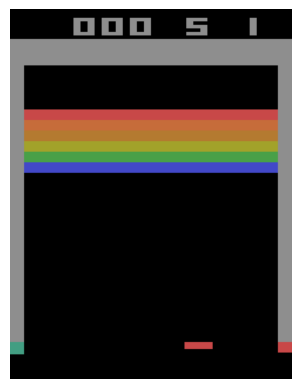

In [4]:
plt.imshow(env.reset()[0])
plt.axis("off")  # Убрать оси координат
plt.show()

In [5]:
env.reset()

n_actions = env.action_space.n
state_dim = env.observation_space.shape

print(f"Action_space: {n_actions} \nState_space: {env.observation_space.shape}")

env.close()

Action_space: 4 
State_space: (210, 160, 3)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
BATCH_SIZE = 32
GAMMA = 0.99
EPS_START = 1
EPS_END = 0.02
EPS_DECAY = 100000
TARGET_UPDATE = 500
RENDER = False
lr = 1e-4
INITIAL_MEMORY = 10_000
MEMORY_SIZE = 10 * INITIAL_MEMORY

In [8]:
policy_net = DQNbn(n_actions=4).to(device)  # убираем действия с FIRE
target_net = DQNbn(n_actions=4).to(device)
# policy_net = DQN(n_actions=4, in_channels=4).to(device)  # убираем действия с FIRE
# target_net = DQN(n_actions=4, in_channels=4).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

steps_done = 0

# create environment
env = gym.make("BreakoutNoFrameskip-v4")
env = make_env(env)

memory = ReplayMemory(MEMORY_SIZE)

In [9]:
train(
    model_name="breakout_dqn",
    env=env,
    n_episodes=10_000,
    memory=memory,
    device=device,
    initial_memory=INITIAL_MEMORY,
    policy_net=policy_net,
    target_net=target_net,
    gamma=GAMMA,
    optimizer=optimizer,
    batch_size=BATCH_SIZE,
    target_update=TARGET_UPDATE,
    eps_end=EPS_END,
    eps_start=EPS_START,
    eps_decay=EPS_DECAY,
    render=False,
)

steps: 37710 avg_10 steps 65.4 reward: 2.0 loss: 0.827 avg_10 loss: 0.467 avg_10 reward: 1.0 eps: 0.692:  10%|▉         | 951/10000 [06:27<2:45:20,  1.10s/it]  

: 

In [ ]:
torch.save(policy_net, "breakout_dqn_model")
policy_net = torch.load("breakout_dqn_model")